<a href="https://colab.research.google.com/github/vishnu-nitc/NLP-Chatbot/blob/main/nlp_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/vishnu-nitc/NLP-Chatbot/main/archive/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv

--2022-12-19 01:12:17--  https://raw.githubusercontent.com/vishnu-nitc/NLP-Chatbot/main/archive/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193631 (189K) [text/plain]
Saving to: ‘IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv’

IHMStefanini_indust 100%[===================>] 189.09K  --.-KB/s    in 0.005s  

2022-12-19 01:12:17 (37.4 MB/s) - ‘IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv’ saved [193631/193631]



In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('/content/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


- 425 Description

In [5]:
df.Data.value_counts()

2017-02-08 00:00:00    6
2016-06-16 00:00:00    5
2016-10-03 00:00:00    4
2017-06-11 00:00:00    4
2016-06-08 00:00:00    4
                      ..
2016-07-18 00:00:00    1
2016-07-20 00:00:00    1
2016-07-21 00:00:00    1
2016-07-23 00:00:00    1
2017-07-09 00:00:00    1
Name: Data, Length: 287, dtype: int64

Data is a Date column

In [6]:
df.Countries.value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

Three distinct values 

In [7]:
df.Local.value_counts().sort_index()


Local_01    57
Local_02    24
Local_03    90
Local_04    56
Local_05    59
Local_06    46
Local_07    14
Local_08    27
Local_09     2
Local_10    44
Local_11     2
Local_12     4
Name: Local, dtype: int64

- 12 different Local values

In [8]:
df['Industry Sector'].value_counts()

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

In [9]:
df['Accident Level'].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

- 5 levels . skewed to level I

In [10]:
df['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

- here 6 are there . only one value for level VI . most of them are level IV or III

In [11]:
df.Genre.value_counts()

Male      403
Female     22
Name: Genre, dtype: int64

Data Skewed two Male gender 

In [12]:
df['Employee or Third Party'].value_counts()

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

In [13]:
df['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

In [14]:
df['Description_Length']=df['Description'].str.len()

In [15]:
df['Description_Length']

0      457
1      307
2      314
3      562
4      487
      ... 
420    220
421    219
422    251
423    187
424    208
Name: Description_Length, Length: 425, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

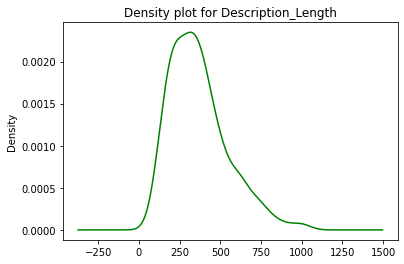

In [17]:
df.Description_Length.plot.density(color='green')
plt.title('Density plot for Description_Length')
plt.show()

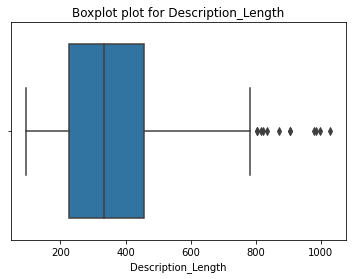

In [18]:
sns.boxplot(x=df["Description_Length"])
plt.title('Boxplot plot for Description_Length')
plt.show()

most of values between 200-400


In [19]:
!pip install tensorflow --quiet

In [20]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
tokenizer = Tokenizer()

In [22]:
tokenizer.fit_on_texts(list(df['Description']))

In [25]:
len(tokenizer.word_counts)

3453

only 3453 words . including stop words


In [27]:
word_count_array = tokenizer.word_counts

In [30]:
type(word_count_array)

collections.OrderedDict

In [34]:
word=[]
counts=[]
for key,val in word_count_array.items():
  word.append(key)
  counts.append(val)

In [36]:
df_cnt=pd.DataFrame(list(zip(word,counts)),columns=['word','count'])

In [37]:
df_cnt.max()

word     ​​the
count     4355
dtype: object

In [38]:
df_cnt.min()

word     0
count    1
dtype: object

In [40]:
df_cnt.nlargest(40,['count'])

,word,count
2,the,4355
5,of,1517
12,to,672
32,and,612
57,in,556
47,a,532
52,was,439
35,at,350
25,on,307
132,that,294


in top 40 most of them are stop words

need to decide on num of words also 

update num_words - parameter to take cut off words .

In [44]:
df_cp=df_cnt.nsmallest(500,['count'])
list(df_cp['word'])

['centralizer',
 'facilitate',
 'accelerate',
 'tightens',
 'activation',
 'piping',
 'uncoupled',
 'sulfide',
 'designed',
 'ambulatory',
 '48',
 'grams',
 'liter',
 '170',
 'flat',
 'beak',
 '695',
 'ob7',
 'soquet',
 'bhb',
 'hexagonal',
 'cristóbal',
 'exert',
 'dado',
 'rotate',
 'anti',
 'clockwise',
 'anthony',
 'group',
 'leader',
 'eduardo',
 'eric',
 'fernández',
 '3015',
 'zaf',
 'marcy',
 '33',
 'heating',
 'unhooking',
 'total',
 'depressurisation',
 'street',
 'ended',
 'hm',
 'miguel',
 'eka',
 'illness',
 'manipulate',
 'bioxide',
 'leads',
 '\u200b\u200bmanual',
 'splashed',
 'fissure',
 '069',
 'subsequently',
 'segment',
 'polyurethane',
 '60x4x5cm',
 'rotated',
 'compress',
 'hip',
 'evacuate',
 'cooking',
 'jaba',
 'tilts',
 'ml',
 "cook's",
 'cook',
 'applies',
 'cold',
 'cyclone',
 'duct',
 'energize',
 '544',
 '440v',
 '400a',
 'thermomagnetic',
 'trailer',
 '08fi0502',
 'shutter',
 'aramid',
 'despite',
 'spatters',
 'facila',
 'hood',
 'rp',
 '050',
 '1620',
 

In [45]:
df_cnt.word[df_cnt.word.str.contains("[^a-zA-Z0-9]")]

104               ​​the
138           cristóbal
171           fernández
249                josé
298            ​​manual
334            worker's
359              cook's
373          ustulación
561          operator's
564         assistant's
571                   °
591             truck's
622          mollares's
630      collaborator's
703          employee's
981              team's
1064             pump's
1435           person's
1562                  ¼
1724           helmet's
1816             lázaro
1927          jehovânio
1980           aripuanã
1993              mário
2044             hand's
2094              ppe's
2106           welder's
2122       casionándole
2142              epp's
2198          machine's
2206           victim's
2221            eusébio
2255              juína
2458         raspándose
2510        ​​equipment
2520         mechanic's
2609              césar
2612              román
2622        martinópole
2624              fábio
2646      propiciándose
2712        carp